In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
data = pd.read_csv('mount/My Drive/esport/6+7/BIPA_data.csv',index_col = 0)
champStat = pd.read_csv('mount/MyDrive/esport/6+7/champ_stats.csv',index_col=0)

#data = pd.read_csv('C:/Users/a/Desktop/BIPA_data.csv',index_col = 0)
#champStat = pd.read_csv('C:/Users/a/Desktop/champ_stats.csv',index_col=0)

In [ ]:
data.shape[0]

1000000

In [ ]:
data.columns

Index(['gameId', 'createDate', 'tierRank', 'position', 'teamId', 'summonerId',
       'championId', 'result', 'level', 'championsKilled', 'numDeaths',
       'assists', 'neutralMinionsKilled', 'turretsKilled', 'barracksKilled',
       'minionsKilled', 'goldEarned', 'physicalDamageDealtToChampions',
       'magicDamageDealtPlayer', 'physicalDamageTaken',
       'sightWardsBoughtInGame', 'visionWardsBoughtInGame', 'wardKilled',
       'wardPlaced', 'totalHeal', 'totalDamageDealtToChampions',
       'totalDamageDealt', 'totalDamageTaken',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilledTeamJungle',
       'visionScore', 'damageSelfMitigated', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'lane', 'gameLength', 'version'],
      dtype='object')

In [ ]:
for i in data['position'].unique():
    print(len(data[data['position']==i]))

200000
200000
200000
200000
200000


In [ ]:
tierPoint = {'I':0 , 'B':400, 'S':800, 'G':1200, 'P':1600, 'D':2000, 'M':2400, 'R':2800, 'C':3200}
inv_tierPoint = {0:'I',  1:'B', 2:'S', 3:'G', 4:'P', 5:'D', 6:'M', 7:'R', 8:'C'}

In [ ]:
def get_meanTier(gameId):
    
    summonerRank = data[data['gameId']==gameId]['tierRank']
    cnt = 0
    pointSum = 0
    
    for tier in summonerRank:
        try:
            pointSum += tierPoint[tier[0]]
            pointSum += (4-int(tier[1]))*100
            cnt += 1
        except:
            pass
    
    if cnt == 0:
        return "0000"
        
    pointSum /= cnt
    tier = inv_tierPoint[int(pointSum/400)]
    division = math.ceil((400-pointSum%400)/100)
    temp = tier + str(division)

    return temp

In [ ]:
nanTierList_idx = data[data['tierRank'].isnull()].index

In [ ]:
for idx in nanTierList_idx:
    data.at[idx, 'tierRank'] = get_meanTier(data.iloc[idx]['gameId'])

In [ ]:
data[data['result']=='UNKNOWN'].shape[0]

13970

In [ ]:
unknown_result_idx = data[data['result']=='UNKNOWN'].index
data = data.drop(unknown_result_idx)

In [ ]:
data.shape[0]

986030

In [ ]:
data['tier'] = data['tierRank'].str[0]
data['division'] = data['tierRank'].str[1]
data = data.drop(['tierRank'], axis=1)

In [ ]:
for i in tierPoint.keys():
    data.loc[data['tier']==i,'mmr'] = tierPoint[i] + (4 - pd.to_numeric(data['division'])) * 100

In [ ]:
data = data[['tier', 'division', 'mmr', 'position', 'level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']]
data.head(3)

,tier,division,mmr,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,1700.0,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,1600.0,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,1700.0,M,11,100,5,1,5,7,4,5,6769,9467,972


In [ ]:
data.shape[0]

986030

In [ ]:
print(data[data['tier']=='0'].shape[0])
nanidx = data[data['tier']=='0'].index

1950


In [ ]:
data = data.drop(nanidx)

In [ ]:
data.shape[0]

984080

In [ ]:
################################################################

In [ ]:
temp = data

In [ ]:
data.shape[0]

984080

In [ ]:
data = data[data['gameLength'] >= 600]

In [ ]:
data.shape[0]

983960

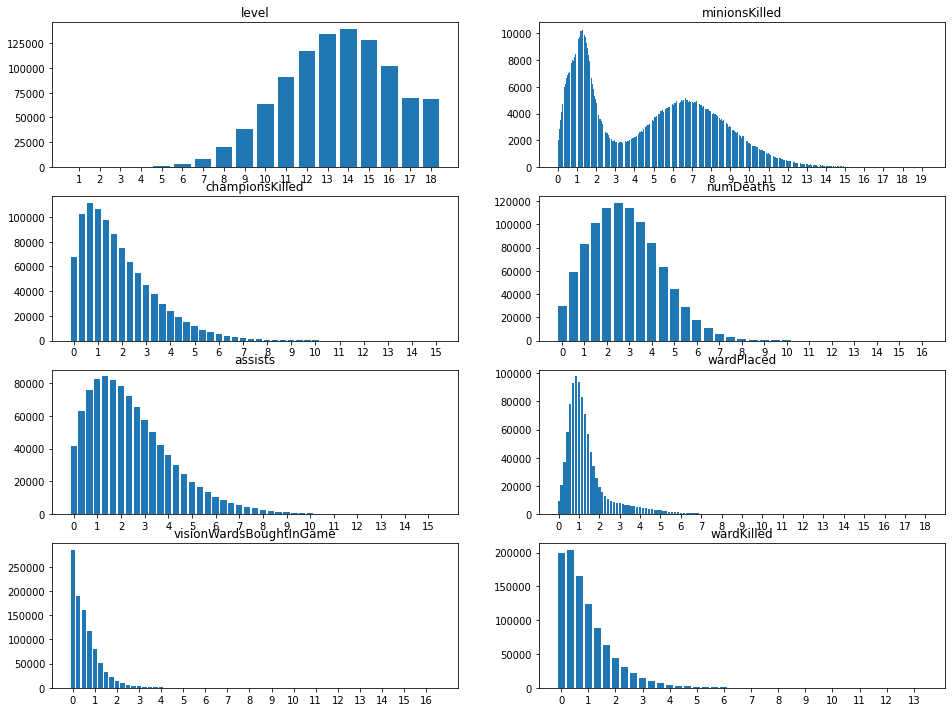

In [ ]:
# 이상치 제거 전 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

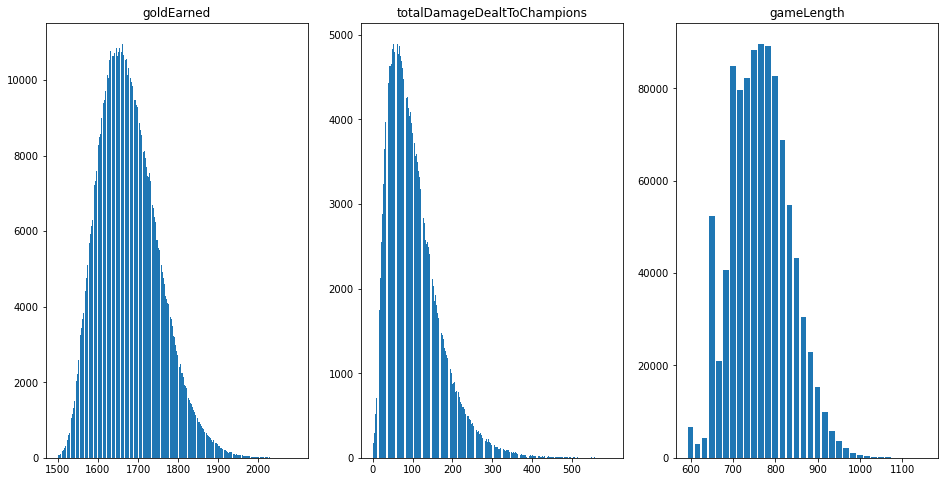

In [ ]:
# 이상치 제거 전 그래프
ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [ ]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [ ]:
# processed_data : 이상치가 제거된 데이터 

processed_data = data
want_data = ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions', 'gameLength']
# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykern

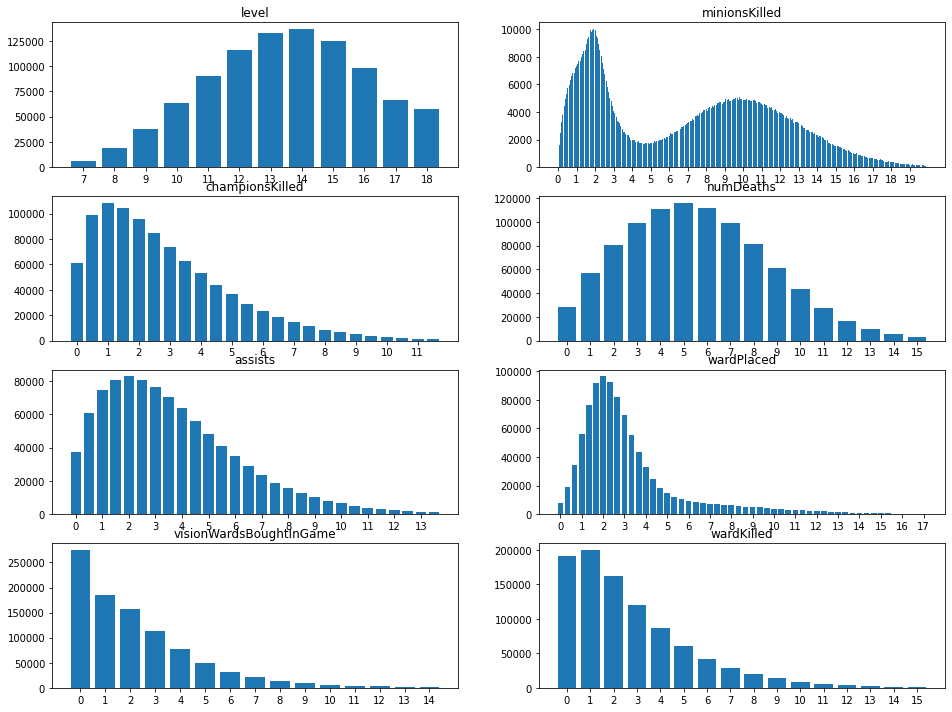

In [ ]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = processed_data[col]
    
    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=20)
    ind += 1

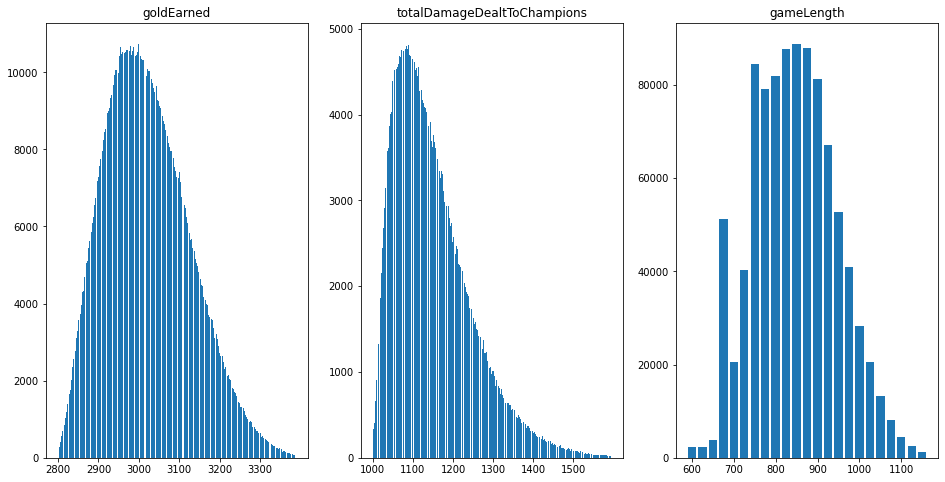

In [ ]:
# 이상치 제거 후 그래프

ind = 1
plt.figure(figsize=(16, 8))

for col in ['goldEarned', 'totalDamageDealtToChampions', 'gameLength']:
    plt.subplot(1, 3, ind)
    plt.title(col)

    d = processed_data[col]
    d = round(d//100, 2) * 100

    uniquelist = sorted(list(d.unique()))
    length = len(uniquelist)

    y = [0 for _ in range(length)]
    for i in range(length):
        y[i] = len(d[d == uniquelist[i]])


    x = range(len(d.unique()))
    plt.bar(x, y)
    plt.xticks(x, uniquelist)
    plt.locator_params(axis='x', nbins=6)
    ind += 1

In [ ]:
processed_data['gameLength'] /= 60

In [ ]:
for it in processed_data.columns[4:len(processed_data.columns)-1]:
    processed_data[it] /= processed_data['gameLength']
processed_data = processed_data.drop(columns='gameLength')

In [ ]:
processed_data.rename(columns={'position':'Position', 'championsKilled':'Kill', 'numDeaths':'Death', 'assists':'Assist', 'minionsKilled':'CS', 'level':'Level', 'totalDamageDealtToChampions':'Damage',
                             'wardPlaced':'Wardplaced', 'visionWardsBoughtInGame':'visionWardplaced', 'wardKilled':'WardKilled', 'goldEarned':'Gold'}, inplace=True)

In [ ]:
processed_data.head(1)

,tier,division,mmr,Position,Level,CS,Kill,Death,Assist,Wardplaced,visionWardplaced,WardKilled,Gold,Damage
0,P,3,1700.0,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728


In [ ]:
processed_data = processed_data[['tier', 'division', 'mmr', 'Position', 'Kill', 'Death', 'Assist', 'CS', 'Level', 'Damage', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold']]

In [ ]:
processed_data.head(4)

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
0,P,3,1700.0,S,0.246914,0.061728,0.308642,0.925926,0.617284,345.061728,0.308642,0.061728,0.061728,375.493827
1,P,4,1600.0,S,0.061728,0.185185,0.185185,0.432099,0.493827,236.234568,0.370370,0.185185,0.185185,254.197531
2,P,3,1700.0,M,0.308642,0.061728,0.308642,6.172840,0.679012,584.382716,0.432099,0.246914,0.308642,417.839506
3,P,4,1600.0,T,0.493827,0.123457,0.061728,7.098765,0.679012,676.728395,0.308642,0.061728,0.000000,492.098765


In [ ]:
################################################################

In [479]:
def mystat(Data, myData, position = 'all', tierCnt = 100):
  
    # tierCnt = 1 : mytier ±1
    # tierCnt = 2 : mytier ±2

    #posT = data[data['position']=='T']
    #posJ = data[data['position']=='J']
    #posM = data[data['position']=='M']
    #posA = data[data['position']=='A']
    #posS = data[data['position']=='S']

    if position != 'all':
        Data = Data[Data['Position'] == position]

    if tierCnt != 100:
        mmr = int(myData['mmr'])
        Data = Data[(mmr-tierCnt*100 <= Data['mmr']) & (Data['mmr'] <= mmr+tierCnt*100)]

    total = pd.concat([Data, myData])

    rankData = total.rank(ascending = False, pct = True)
    myRankData = rankData[rankData.index == 'me']
    myRankData = round(myRankData, 3)
    myRankData *= 100

    myRankData = myRankData[['Level', 'CS', 'Kill', 'Death', 'Assist', 'Wardplaced', 'visionWardplaced', 'WardKilled', 'Gold', 'Damage']]
    return myRankData

In [480]:
index = 5122

temp_pos = pd.DataFrame(processed_data.iloc[index]).T
temp_pos = temp_pos.rename(index={5402:'me'}) # 5122 index -> 5402
temp_pos

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
me,G,3,1300,A,0.18251,0.228137,0.0456274,5.01901,0.501901,446.875,0.273764,0.0456274,0.0456274,332.669


In [481]:
temp_pos

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
me,G,3,1300,A,0.18251,0.228137,0.0456274,5.01901,0.501901,446.875,0.273764,0.0456274,0.0456274,332.669


In [482]:
processed_data.head(1)

,tier,division,mmr,Position,Kill,Death,Assist,CS,Level,Damage,Wardplaced,visionWardplaced,WardKilled,Gold
0,P,3,1700.0,S,0.246914,0.061728,0.308642,0.925926,0.617284,345.061728,0.308642,0.061728,0.061728,375.493827


In [483]:
res = mystat(processed_data, temp_pos)
res

,Level,CS,Kill,Death,Assist,Wardplaced,visionWardplaced,WardKilled,Gold,Damage
me,47.7,43.4,47.2,38.5,93.3,54.6,57.0,65.1,64.5,61.7


In [484]:
res = mystat(processed_data, temp_pos, 'J', 1)
res

,Level,CS,Kill,Death,Assist,Wardplaced,visionWardplaced,WardKilled,Gold,Damage
me,54.6,0.0,61.3,35.0,95.9,28.2,77.9,80.4,79.7,62.3


In [485]:
res = mystat(processed_data, temp_pos, 'J', 2)
res

,Level,CS,Kill,Death,Assist,Wardplaced,visionWardplaced,WardKilled,Gold,Damage
me,54.9,0.0,61.4,34.7,95.9,28.3,77.6,80.0,79.7,62.3


In [ ]:
################################################################################################ 여기까지해보시면됩니다!

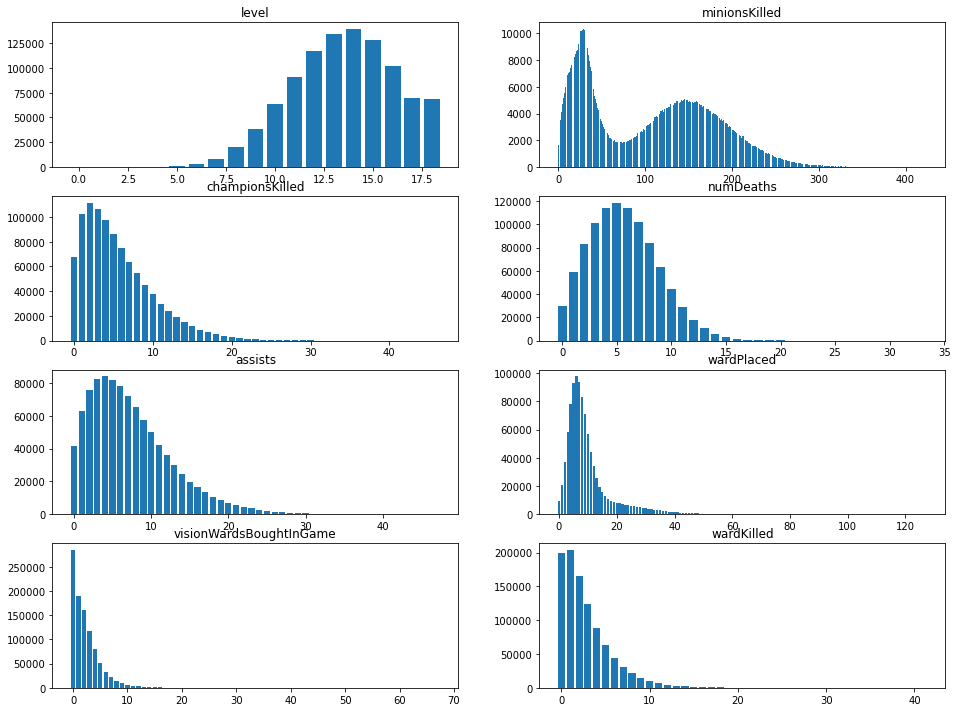

In [ ]:
ind = 1
plt.figure(figsize=(16,16))
plt.subplots_adjust(bottom=0.001)

for col in ['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']: 
    plt.subplot(6, 2, ind)
    plt.title(col)
    
    d = data[col]
    d_len = len(d.unique())
    d_num = [0 for i in range(d_len+1)]

    for i in range(d_len+1):
      d_num[i]=len(d[d==i])

    num = range(d_len+1)
    plt.bar(num, d_num)
    ind += 1

<BarContainer object of 22305 artists>

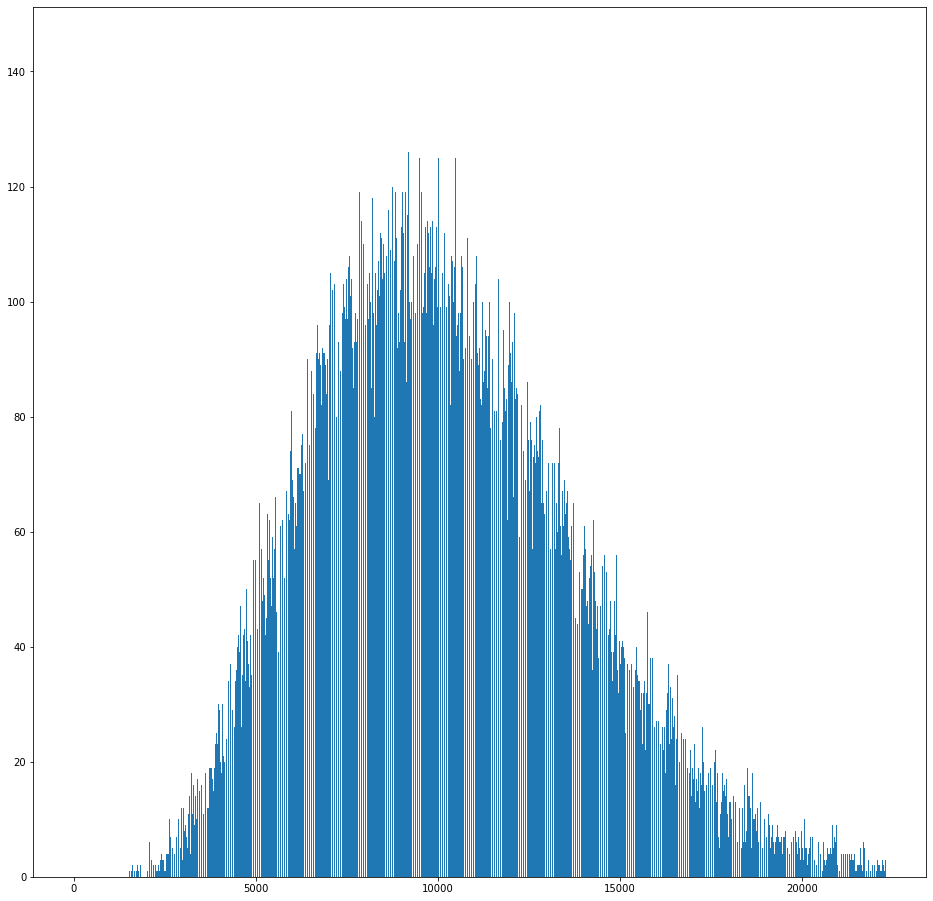

In [ ]:
plt.figure(figsize=(16,16))

col = 'goldEarned'
d = data[col]
d_len = len(d.unique())
d_num = [0 for i in range(d_len+1)]

for i in range(d_len+1):
  d_num[i]=len(d[d==i])

num = range(d_len+1)
plt.bar(num, d_num)

In [ ]:
# 위에 그래프들을 통해서 --> 이상치 제거 기준을 세울 수 있다
# level : 하위 0.3퍼 제거
# 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled' : 상위 0.3퍼 제거
# 'goldEarned', 'totalDamageDealtToChampions', 'gameLength' : 하위, 상위 0.3퍼 제거

In [ ]:
processed_data = data

# 하위 0.3퍼, 상위 0.3퍼 데이터를 제거한다
for col in want_data:
    minimum = data[col].quantile(0.003)
    maximum = data[col].quantile(0.997)
    if col == 'level':
        processed_data = processed_data[data[col] > minimum]
    
    elif col in ['minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced','visionWardsBoughtInGame', 'wardKilled']:
        processed_data = processed_data[data[col] < maximum]
    
    else:
         processed_data = processed_data[processed_data[col] < maximum]
         processed_data = processed_data[processed_data[col] > minimum]

        
# processed_data : 이상치가 제거된 데이터 
processed_data

C:\Users\Brena-29\AppData\Local\Temp/ipykernel_11600/1059969200.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_data = processed_data[data[col] < maximum]


,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,S,10,15,4,1,5,5,1,1,6083,5590,972
1,P,4,S,8,7,1,3,3,6,3,3,4118,3827,972
2,P,3,M,11,100,5,1,5,7,4,5,6769,9467,972
3,P,4,T,11,115,8,2,1,5,1,0,7972,10963,972
4,P,3,A,10,110,3,2,9,5,1,2,7552,6465,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,S,1,S,15,29,1,11,7,29,4,7,8451,10019,2379
999996,G,4,M,18,251,10,6,3,8,0,1,18291,37581,2379
999997,G,4,J,17,40,5,5,22,13,3,2,12986,20994,2379
999998,S,1,A,17,260,6,5,3,11,1,4,15674,37078,2379


In [ ]:
processed_data['gameLength'] /= 60

In [ ]:
for it in processed_data.columns[3:len(processed_data.columns)-1]:
    processed_data[it] /= processed_data['gameLength']

In [ ]:
processed_data.head(3)

,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions,gameLength
0,P,3,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728,16.2
1,P,4,S,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568,16.2
2,P,3,M,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716,16.2


In [ ]:
#data.describe(include=['number'])

In [ ]:
processed_data = processed_data.drop(columns='gameLength')
processed_data.head(3)

,tier,division,position,level,minionsKilled,championsKilled,numDeaths,assists,wardPlaced,visionWardsBoughtInGame,wardKilled,goldEarned,totalDamageDealtToChampions
0,P,3,S,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728
1,P,4,S,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568
2,P,3,M,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716


In [ ]:
################################################################################################################################

In [ ]:
# 확인하고 싶은 아이디 입력
summoner_name = 'bbo bbo'

In [ ]:
# selenium을 백그라운드로 실행하기 위해 옵션 설정 _ windows
#options = webdriver.ChromeOptions()
#options.add_argument('headless')
#options.add_argument('window-size=1920x1080')

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
driver.get(summoner_url)

In [ ]:
# selenium으로 실행시킬 url설정
#summoner_url = 'https://poro.gg/summoner/kr/' + summoner_name
#chrome_driver_path = "C:/Users/a/Desktop/chromedriver" # windows
#driver = webdriver.Chrome(chrome_driver_path) #windows
#driver = webdriver.Chrome('chromedriver', chrome_options=options)

#driver.get(summoner_url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
# 솔로랭크의 자료만을 원하므로, 솔로랭크 버튼 클릭
solo_rank_button = driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(1) > div.summoner-box__content > div > div.match-history-filter__queue-types > button:nth-child(2)")
solo_rank_button.click()
time.sleep(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


In [ ]:
# 컨테이너의 정보들은, start가 3부터 시작해서, 1씩 더해지며 쌓인다.
# 각 컨테이너 마다 (+) 버튼 눌러주는 코드
start = 3
while True:
    try:
        driver.find_element_by_css_selector("#vue-profile > div.match-history-container.mt-3 > div:nth-child(" + str(start) + ") > div > div.match-history__expand-toggle").click()
        time.sleep(0.5)
        start += 1
    
    except Exception as e:
        pass
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


In [ ]:
# 전체 펼친 html
summoner_html = driver.page_source
summoner_soup = BeautifulSoup(summoner_html, 'html.parser')

In [ ]:
driver.quit()

In [ ]:
summoner_games_html = summoner_soup.select('div.match-history__content')

In [ ]:
# 불러오는 게임의 수
# games_len = len(summoner_games_html)
games_len = 13

In [ ]:
# 확인하고 싶은 자료 선정
Damage = []
CS = []
Tower = []
Wardplaced = []
visionWardplaced = []
WardKilled = []
Kill = []
Death = []
Assist = []
Level = []
Gold = []
#
Gamelength = []

In [ ]:
# 각각의 정보들을 각 리스트에 담아준다.
for i in range(games_len):
    Level.append(int(list(summoner_games_html[i].select_one('div.champion').stripped_strings)[0]))
    CS.append(int(list(summoner_games_html[i].select_one('div.info').stripped_strings)[3]))
    Kill.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[0]))
    Death.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[2]))
    Assist.append(int(list(summoner_games_html[i].select_one('div.kda').stripped_strings)[4]))
    Wardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[1]))
    visionWardplaced.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[0]))
    WardKilled.append(int(list(summoner_games_html[i].select_one(' div.wards.mt-1').stripped_strings)[2]))
    
    #
    gl = list(summoner_games_html[i].select_one('span.mt-md-1'))[0].split(':')
    Gamelength.append(int(gl[0])*60 + int(gl[1]))

In [ ]:
# 게임의 결과가 승리인지 패배인지 알려주는 html
# 각 게임의 '자세히보기' 버튼을 눌러야 나오는 정보들을 담는 코드

for i in range(games_len):
    summoner_games_html = summoner_soup.select('div.match-history__result')
    if list(summoner_games_html[i].stripped_strings)[0] == '패배':
        summoner_games_html = summoner_soup.select('div.match-history-detail__content')
        selector1 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        selector2 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div.col-12.col-lg-6.border-e6-left-md > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
    elif list(summoner_games_html[i].stripped_strings)[0] == '승리':
        summoner_games_html = summoner_soup.select('div.match-history-detail__content')
        selector1 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.wards > div:nth-child(2) > span'
        selector2 = '#vue-profile > div.match-history-container.mt-3 > div:nth-child(' + str(i+3) + ') > div.match-history-detail > div.match-history-detail__content > div > div > div:nth-child(1) > div > div.match-detail-overview__summoners > div.match-detail-overview__summoner.match-detail-overview__summoner--me > div > div.match-detail-overview__summoner__column.stats > div.graph > span'
        
    gold = list(summoner_games_html[i].select_one(selector1).stripped_strings)[0]
    damage = list(summoner_games_html[i].select_one(selector2).stripped_strings)[0]
    if gold[-1] == '천':
        g = float(gold[:-1])
        g = int(g * 1000)
        Gold.append(g)
        
    elif gold[-1] == '만':
        g = float(gold[:-1])
        g = int(g * 10000)
        Gold.append(g)
        
    if ',' in damage:
        damage = damage.replace(',', '')
        damage = int(damage)
        Damage.append(damage)
    
    time.sleep(0.5)

NameError: ignored

In [ ]:
# 내 평균 데이터들을 구하는 코드
# 각 데이터의 합을 (60/게임시간) 즉, 분으로 나누어서 나타낸다.

my_average_cs = round((sum(CS) * 60) / (sum(Gamelength)), 3)
my_average_kill = round((sum(Kill) * 60) / (sum(Gamelength)), 3)
my_average_death = round((sum(Death) * 60) / (sum(Gamelength)), 3)
my_average_Assist = round((sum(Assist) * 60) / (sum(Gamelength)), 3)
my_level = round((sum(Level) * 60) / (sum(Gamelength)), 3)
my_wardplaced = round((sum(Wardplaced) * 60) / (sum(Gamelength)), 3)
my_visionWardplaced = round((sum(visionWardplaced) * 60) / (sum(Gamelength)), 3)
my_wardkilled = round((sum(WardKilled) * 60) / (sum(Gamelength)), 3)
my_gold = round((sum(Gold) * 60) / (sum(Gamelength)), 3)
my_damage = round((sum(Damage) * 60) / (sum(Gamelength)), 3)

dataindex = ["Level", "CS", "Kill", "Death", "Assist", "wardPlaced", 
             "visionwardPlaced", "wardkilled", "Gold", "Damage"]
mydatacol = [my_level, my_average_cs, my_average_kill, my_average_death, 
                   my_average_Assist, my_wardplaced, my_visionWardplaced, my_wardkilled,
                  my_gold, my_damage]

In [ ]:
# 데이터 프레임으로 그 정보들을 확인한다.
mydata = pd.DataFrame(mydatacol, index = dataindex).T
mydata.index = ['me']
mydata

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,0.504,5.393,0.256,0.185,0.351,0.319,0.185,0.15,423.36,702.927


In [ ]:
data.head(1)
asd_data = processed_data[['level', 'minionsKilled', 'championsKilled', 'numDeaths', 'assists', 'wardPlaced', 'visionWardsBoughtInGame', 'wardKilled', 'goldEarned', 'totalDamageDealtToChampions']]
asd_data.columns = dataindex
total = pd.concat([mydata, asd_data])

In [ ]:
total

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,0.504000,5.393000,0.256000,0.185000,0.351000,0.319000,0.185000,0.150000,423.360000,702.927000
0,0.617284,0.925926,0.246914,0.061728,0.308642,0.308642,0.061728,0.061728,375.493827,345.061728
1,0.493827,0.432099,0.061728,0.185185,0.185185,0.370370,0.185185,0.185185,254.197531,236.234568
2,0.679012,6.172840,0.308642,0.061728,0.308642,0.432099,0.246914,0.308642,417.839506,584.382716
3,0.679012,7.098765,0.493827,0.123457,0.061728,0.308642,0.061728,0.000000,492.098765,676.728395
...,...,...,...,...,...,...,...,...,...,...
999995,0.378310,0.731400,0.025221,0.277427,0.176545,0.731400,0.100883,0.176545,213.139975,252.686003
999996,0.453972,6.330391,0.252207,0.151324,0.075662,0.201765,0.000000,0.025221,461.311475,947.818411
999997,0.428752,1.008827,0.126103,0.126103,0.554855,0.327869,0.075662,0.050441,327.515763,529.482976
999998,0.428752,6.557377,0.151324,0.126103,0.075662,0.277427,0.025221,0.100883,395.308953,935.132409


In [ ]:
# 데이터를 rank함수를 통해 상위 %로 바꾼다 
rank_data = total.rank(ascending = False, pct = True)
rank_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,0.466942,0.371863,0.300634,0.545072,0.250205,0.397638,0.122370,0.220829,0.270474,0.264076
0,0.073556,0.839753,0.319947,0.916357,0.325655,0.431872,0.499500,0.570011,0.459493,0.770042
1,0.525709,0.955053,0.827504,0.544260,0.617585,0.279216,0.122022,0.147597,0.919938,0.908381
2,0.020803,0.230407,0.211613,0.916357,0.325655,0.206454,0.054748,0.027969,0.290131,0.410337
3,0.020803,0.091938,0.050379,0.764873,0.904254,0.431872,0.499500,0.899211,0.094604,0.292847
...,...,...,...,...,...,...,...,...,...,...
999995,0.985342,0.891255,0.934231,0.229204,0.640618,0.096960,0.331076,0.164183,0.986185,0.890022
999996,0.758398,0.202877,0.308648,0.665177,0.877793,0.749114,0.855436,0.794450,0.157986,0.087274
999997,0.876150,0.815301,0.632116,0.755296,0.059765,0.369910,0.432902,0.618557,0.667068,0.489974
999998,0.876150,0.165395,0.553713,0.755296,0.877793,0.534301,0.705193,0.382554,0.376232,0.092918


In [ ]:
# 나의 데이터만을 추출한다.
my_rank_data = rank_data[rank_data.index == 'me']
my_rank_data = round(my_rank_data, 3)
my_rank_data *= 100

In [ ]:
# 이상치 제거 후 내가 상위 몇퍼인가 결과
my_rank_data

,Level,CS,Kill,Death,Assist,wardPlaced,visionwardPlaced,wardkilled,Gold,Damage
me,46.7,37.2,30.1,54.5,25.0,39.8,12.2,22.1,27.0,26.4


In [ ]:
########################################################################################################